In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [291]:
pd.set_option("display.max_columns",None)

In [292]:
df=pd.read_csv("train.csv")
df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [293]:
df.shape

(800, 22)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [295]:
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [296]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [297]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [298]:
df["age"]=df["age"].astype(int)

In [299]:
for col in df.columns:
    numerical_features=["ID","age","result"]
    if col not in numerical_features:
        print(col,df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [300]:
df=df.drop(columns=["ID","age_desc"])

In [301]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [302]:
mapping={
    "Viet Nam":"Vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong":"China"
}
df["contry_of_res"]=df["contry_of_res"].replace(mapping)

In [303]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [304]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**Insights**
1. Missing values in ethinicity and relation
2. age_desc columnhas only 1 unique value. so it is removed as it is not important for prediction
3. fixed country names
4. Identified class imbalance in the target column.

## EDA

In [305]:
df.shape

(800, 20)

In [306]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [307]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [308]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

In [309]:
# Numerical Column (age, result)
sns.set_theme(style="darkgrid", palette="viridis")

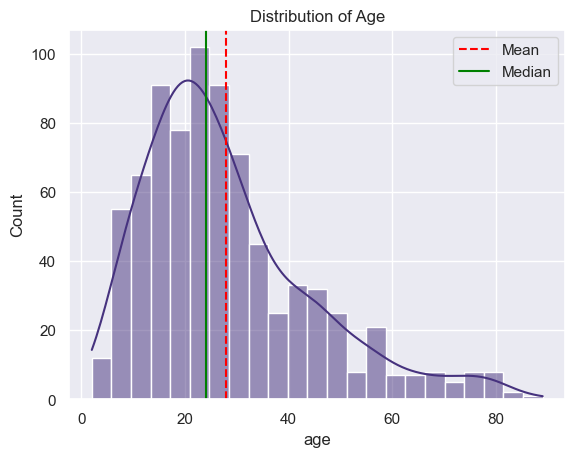

In [310]:
sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")
age_mean=df.age.mean()
age_median=df.age.median()
plt.axvline(age_mean,color="red",linestyle="--",label="Mean")
plt.axvline(age_median,color="green",linestyle="-",label="Median")
plt.legend()
plt.show()

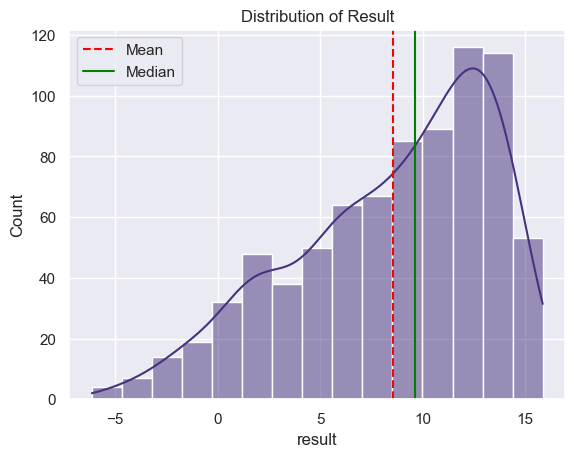

In [311]:
sns.histplot(df["result"], kde=True)
plt.title("Distribution of Result")
result_mean = df.result.mean()
result_median = df.result.median()
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")
plt.legend()
plt.show()

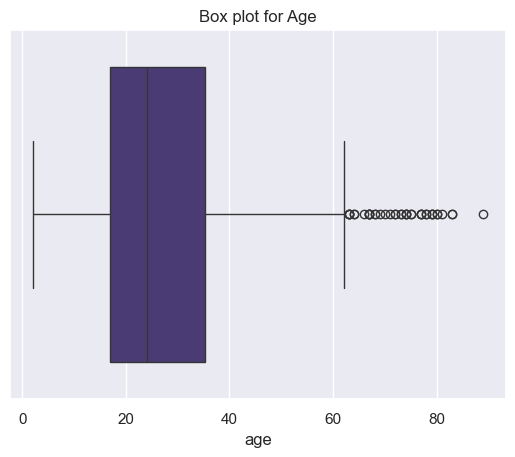

In [312]:
sns.boxplot(x=df["age"])
plt.title("Box plot for Age")
plt.show()

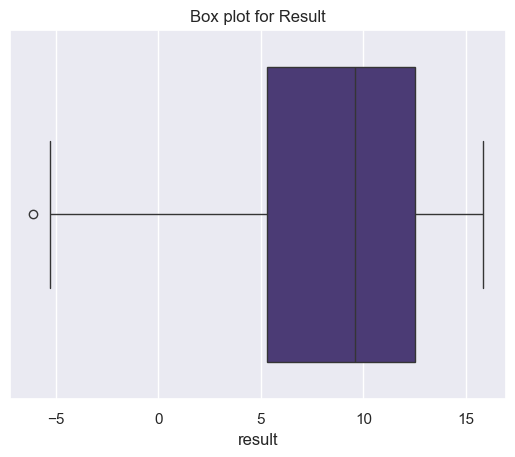

In [313]:
sns.boxplot(x=df["result"])
plt.title("Box plot for Result")
plt.show()

In [314]:
# Counting the outliers using IQR method
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers = df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]
len(age_outliers)

39

In [315]:
age_outliers.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0


In [316]:
# Counting the outliers using IQR method
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers = df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]
len(result_outliers)

413

- Univariate analysis of categorical columns

In [317]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

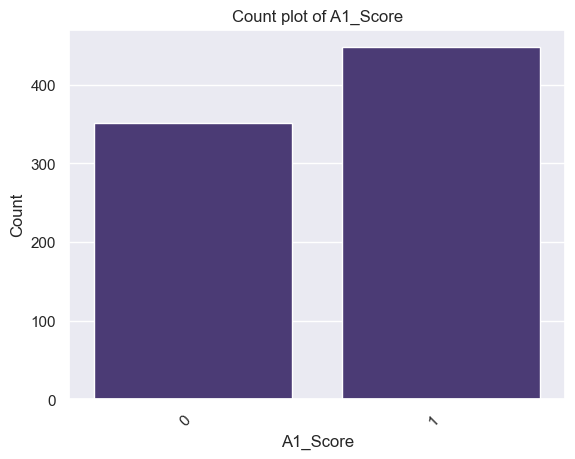

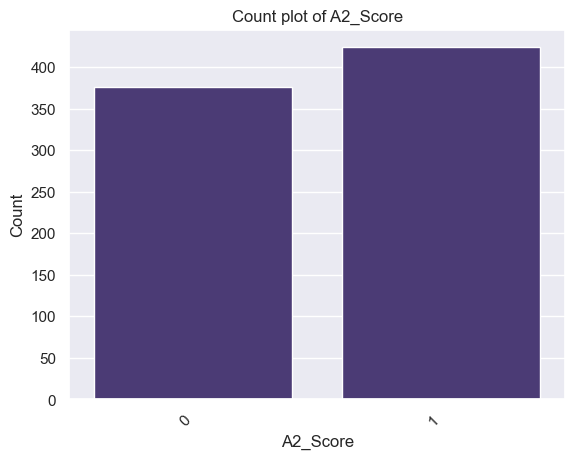

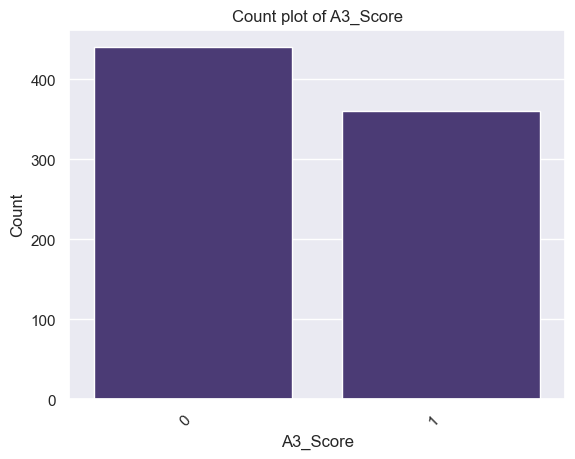

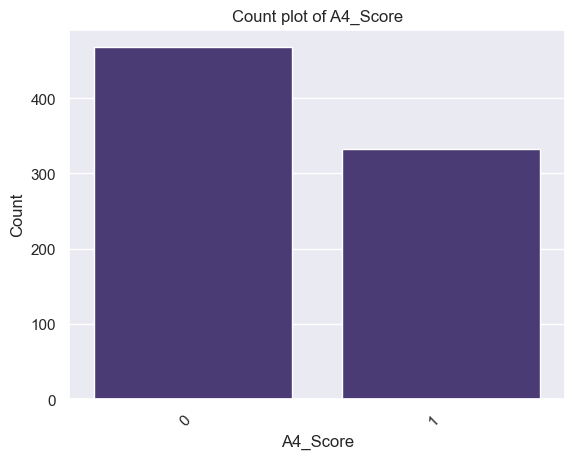

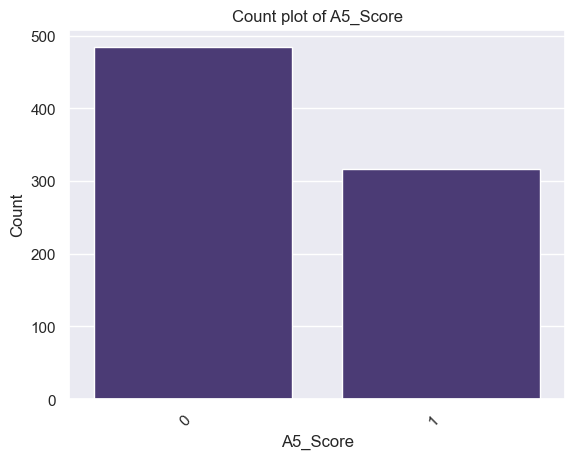

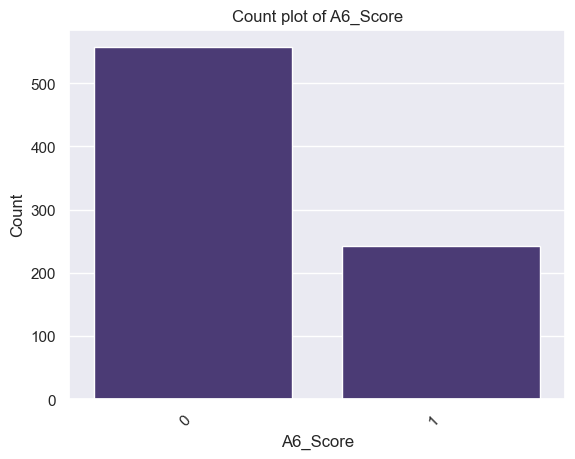

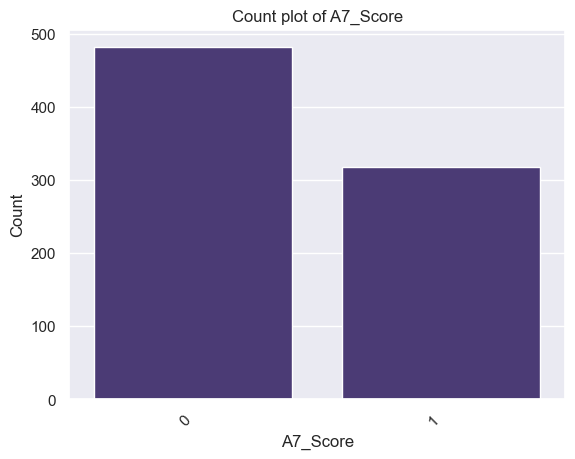

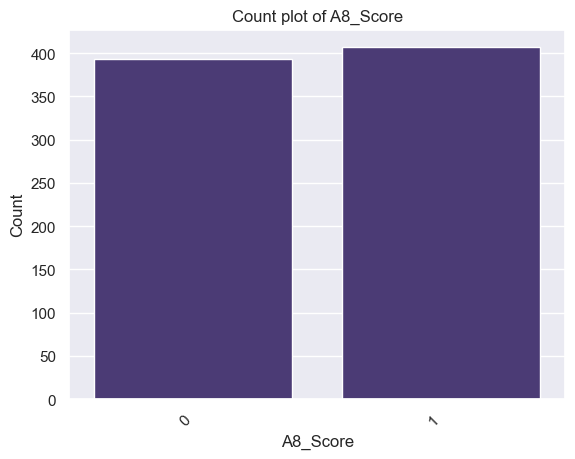

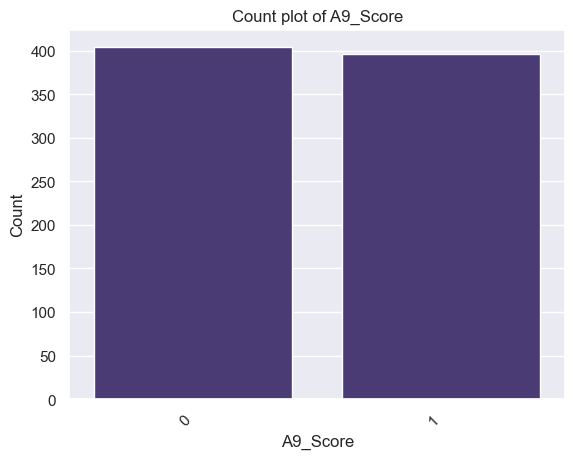

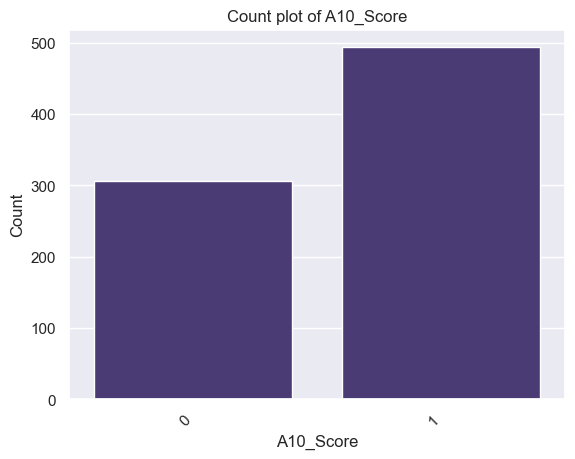

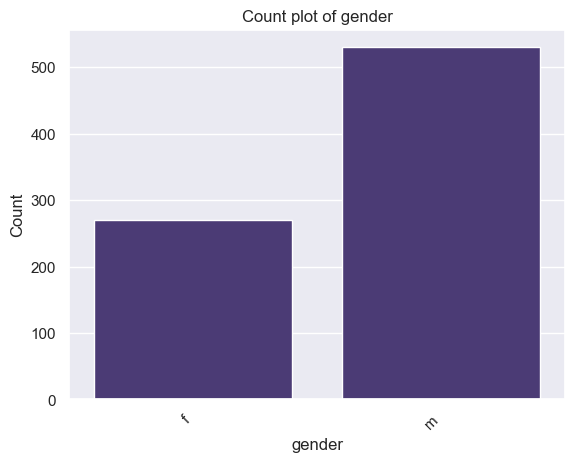

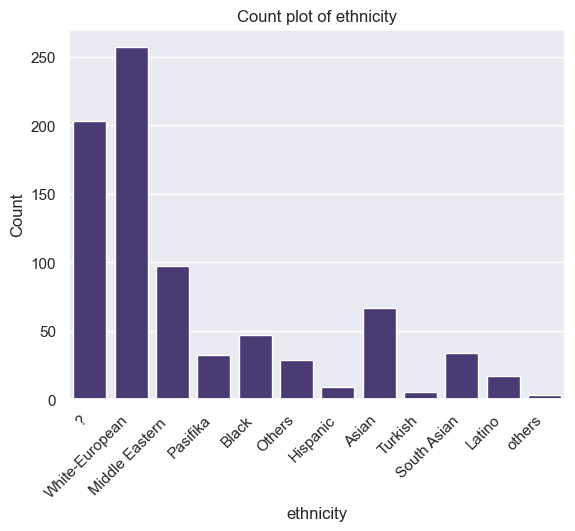

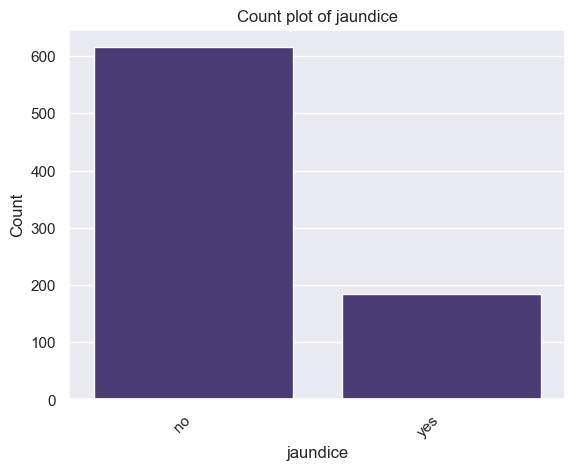

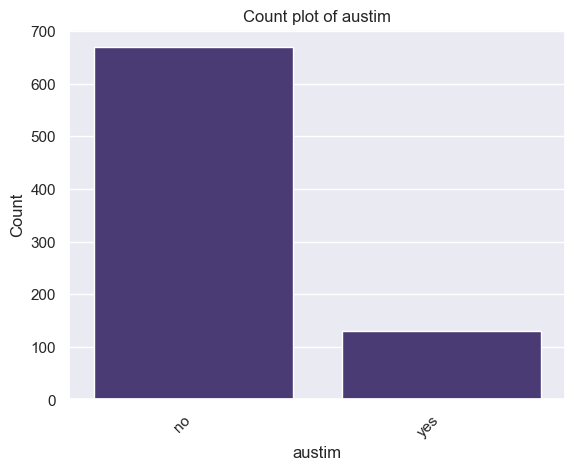

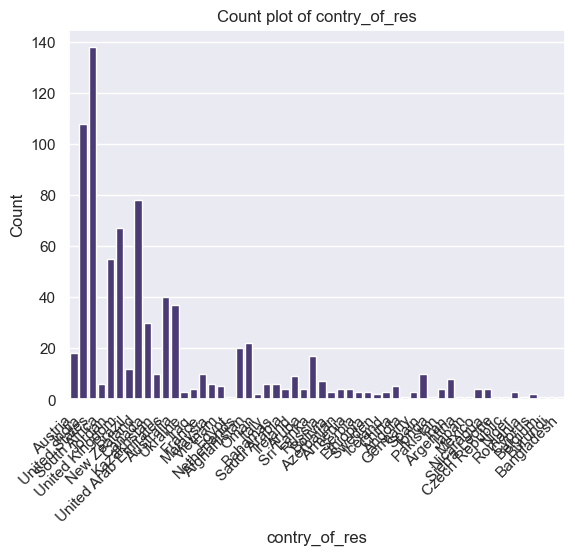

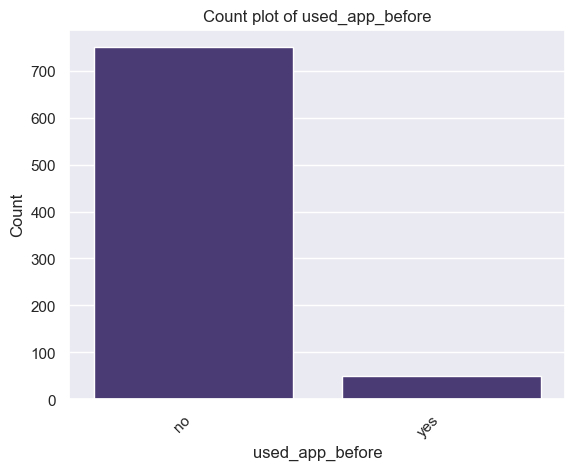

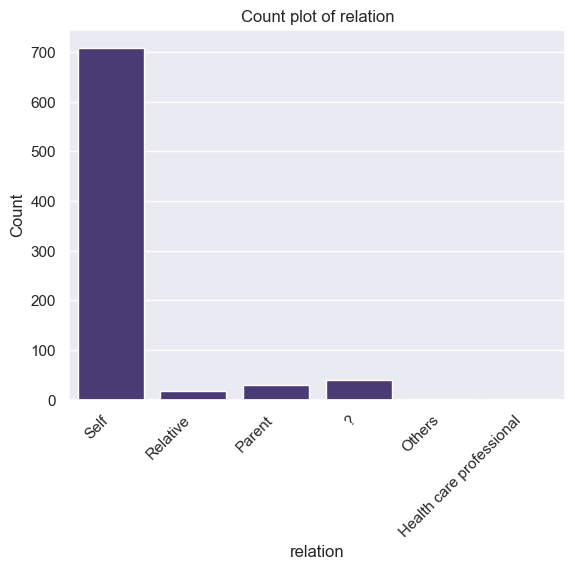

In [318]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    if len(col)>4:
        plt.xticks(rotation=45,ha='right')
    plt.show()

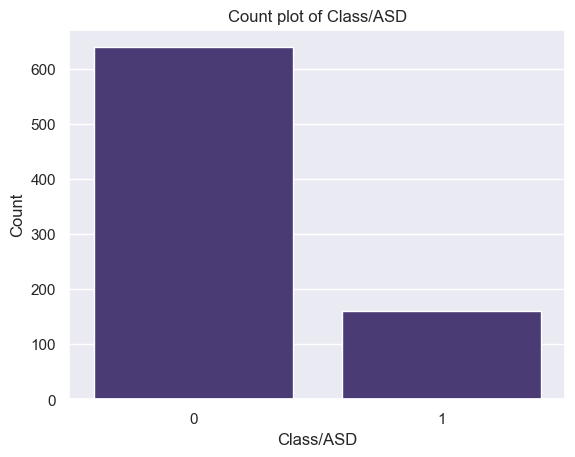

In [319]:
# Count plot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title(f"Count plot of Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

- Handle missing values in ethinicity and relation column

In [320]:
df["ethnicity"]=df["ethnicity"].replace({"?":"Others","others":"Others"})
df.ethnicity.unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [321]:
df.relation.unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [322]:
df["relation"]=df["relation"].replace({
    "?":"Others",
    "Relative":"Others",
    "Health care professional":"Others",
    "Parent":"Others",
})
df.relation.unique()

array(['Self', 'Others'], dtype=object)

In [323]:
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1


- Label Encoding

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [325]:
# Identify columns with object data type
object_column=df.select_dtypes(include=["object"]).columns
print(object_column)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [326]:
# Initialize a dictionary to store the encoers

encoders={}

for column in object_column:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder

with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [327]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [328]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


**Bivariate Analysis**
- Correlation matrix

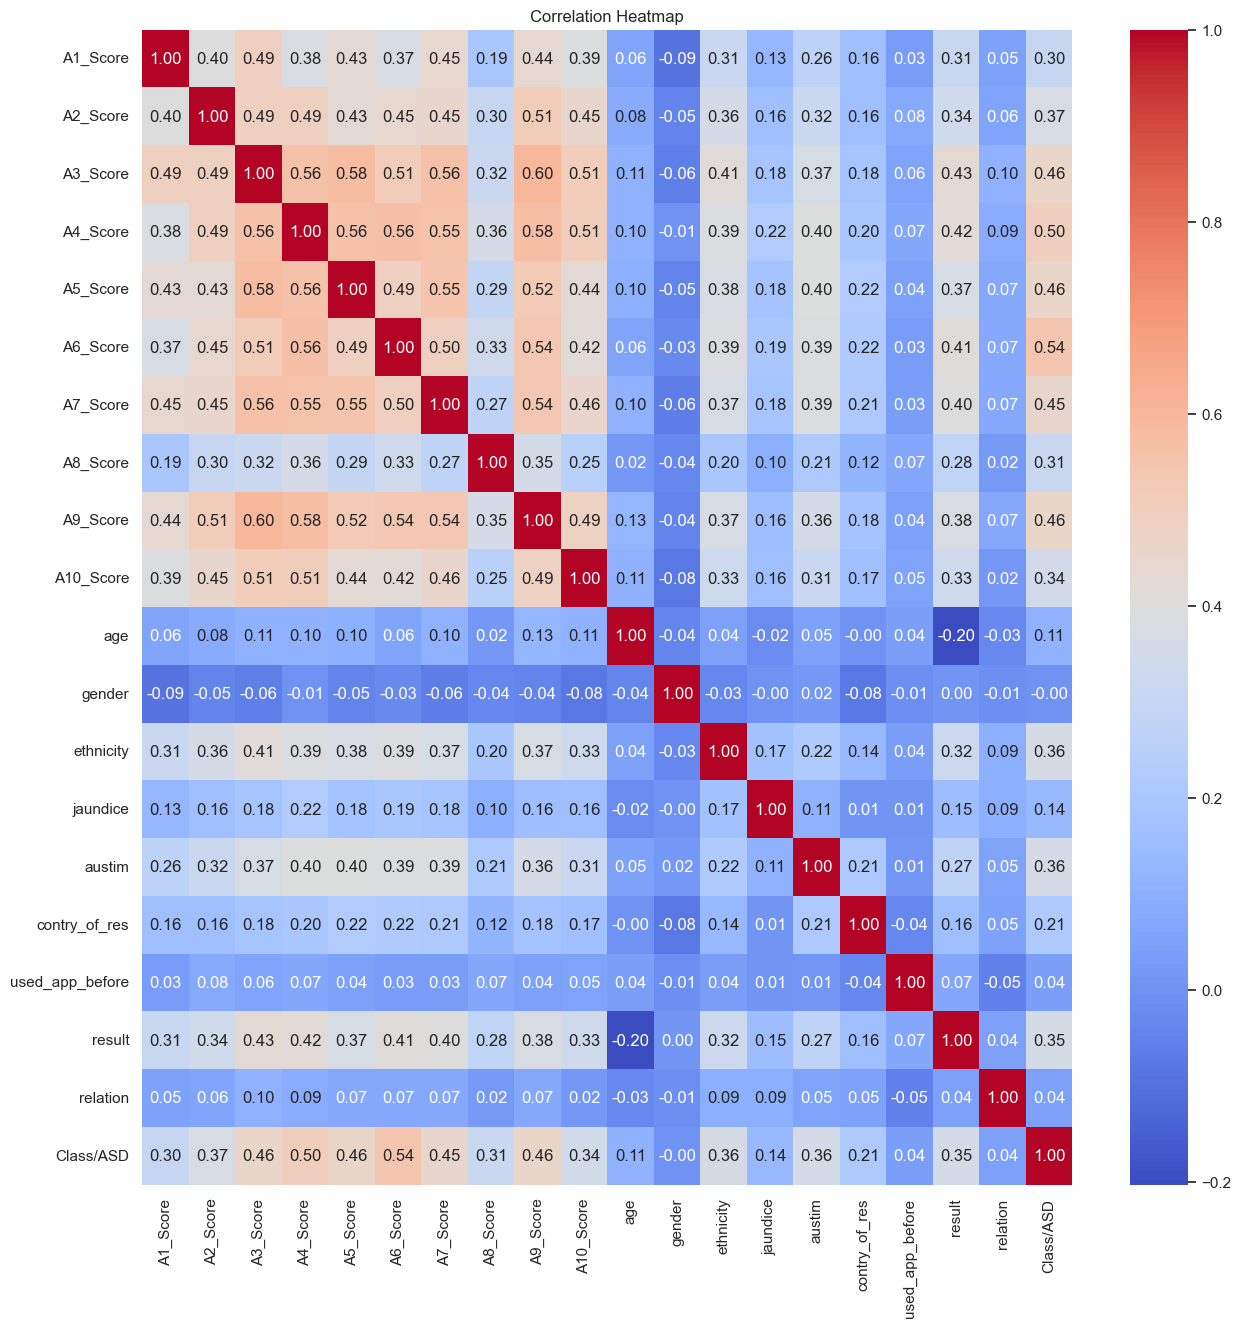

In [329]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insgihts from EDA**
1. There are few outliers in the numerical columns (age,results)
2. There is a class imbalance in the target column
3. There is a class imbalance in the categorical features
4. We dont have any highly correlated column
5. Performed the label encoding and saved the encoders

## Data Preprocessing

In [330]:
# Handling the outliers
def replace_outliers_with_median(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR-Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    median=df[column].median()
    df[column]=df[column].apply(lambda x: median if x< lower_bound or x> upper_bound else x)

    return df

In [331]:
df=replace_outliers_with_median(df,"age")
df=replace_outliers_with_median(df,"result")

In [332]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,24.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


### Train Test Split

In [333]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [334]:
x=df.drop(columns=["Class/ASD"])
y=df["Class/ASD"]

In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [336]:
print(y_test.shape)
print(y_train.shape)

(160,)
(640,)


In [337]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [338]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

**SMOTE (Synthetic Modelling Oversampling Technique)**

In [339]:
smote=SMOTE(random_state=42)

In [340]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [341]:
y_train_smote.shape

(1030,)

In [342]:
y_train_smote.value_counts()

Class/ASD
1    515
0    515
Name: count, dtype: int64

## Model Training

In [343]:
# List of classifiers
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [344]:
# Dictionary to store the cross validation results

cv_scores={}

# Performing 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parametres...")
    scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
    cv_scores[model_name]=scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parametres...
Decision Tree Cross-Validation Accuracy: 0.85
--------------------------------------------------
Training Random Forest with default parametres...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parametres...
XGBoost Cross-Validation Accuracy: 0.89
--------------------------------------------------


In [345]:
cv_scores

{'Decision Tree': array([0.78640777, 0.83980583, 0.89805825, 0.86893204, 0.84951456]),
 'Random Forest': array([0.90776699, 0.9223301 , 0.91262136, 0.9223301 , 0.91262136]),
 'XGBoost': array([0.86893204, 0.90776699, 0.89805825, 0.88349515, 0.90776699])}

**Model selection and Hyperparameter Tuning**

In [350]:
# Initializing models
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost_classifier=XGBClassifier(random_state=42)

In [351]:
# Hyperparameter grids for RandomizedSearchCV
param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
    }

param_grid_rf= {
    "n_estimators":[50,100,200,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_xgb= {
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsmaple":[0.5,0.7,1.0],
    "solsample_bytree":[0.5,0.7,1.0]
}

In [352]:
# Hyperparameter tuning for 3 tree based models

# Performing RandomizedSearchCV for each model
random_search_dt=RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=10, cv=5,scoring="accuracy", random_state=42)
random_search_rf=RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=10, cv=5,scoring="accuracy", random_state=42)
random_search_xgb=RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=10, cv=5,scoring="accuracy", random_state=42)
# random_search_dt.fit(x_train_smote,y_train_smote)

In [353]:
# Fitting the models

random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

c:\Users\DIVYA K BANJARE\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:52:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "solsample_bytree", "subsmaple" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DIVYA K BANJARE\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:52:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "solsample_bytree", "subsmaple" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DIVYA K BANJARE\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:52:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "solsample_bytree", "subsmaple" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DIVYA K BANJARE\AppData\Local\Programs\Python\Python313\Lib\site

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], 'solsample_bytree': [0.5, 0.7, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [355]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

DecisionTreeClassifier(max_depth=70, random_state=42)
0.8485436893203883
RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
0.9126213592233011


In [354]:
best_model=None
best_score=0

if random_search_dt.best_score_>best_score:
    best_model=random_search_dt.best_estimator_
    best_score=random_search_dt.best_score_

if random_search_rf.best_score_>best_score:
    best_model=random_search_rf.best_estimator_
    best_score=random_search_rf.best_score_

if random_search_xgb.best_score_>best_score:
    best_model=random_search_xgb.best_estimator_
    best_score=random_search_xgb.best_score_

In [356]:
print(f"Best Model : {best_model}")
print(f"Best Cross_validation Accuracy : {best_score:.2f}")

Best Model : RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
Best Cross_validation Accuracy : 0.91


In [357]:
# Saving the best model
with open("best_model.pkl","wb") as f:
          pickle.dump(best_model,f)

- Model Evaluation

In [360]:
# Evaluating on the test model
y_test_pred=best_model.predict(x_test)
print("Accuracy score\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuracy score
 0.825
Confusion Matrix
 [[108  16]
 [ 12  24]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       124
           1       0.60      0.67      0.63        36

    accuracy                           0.82       160
   macro avg       0.75      0.77      0.76       160
weighted avg       0.83      0.82      0.83       160

